In [2]:
import struct

In [11]:
with open("guitar.wav", 'rb') as wav_file:
    wav = wav_file.read()
    data = wav[44:]
    print(wav)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [4]:
# [시작인덱스, 바이트길이, 엔디언]
RIFF_chunkID = [0, 4, 'big']
RIFF_ChunkSize = [4, 4, 'little']
RIFF_Format = [8, 4, 'big']

fmt_SubChunk1ID = [12, 4, 'big']
fmt_SubChunk1Size = [16, 4, 'little']
fmt_AudioFormat = [20, 2, 'little']
fmt_NumChannels = [22, 2, 'little']
fmt_SampleRate = [24, 4, 'little']
fmt_ByteRate = [28, 4, 'little']
fmt_BlockAlign = [32, 2, 'little']
fmt_BitsPerSample = [34, 2, 'little']

data_SubChunk2ID = [36, 4, 'big']
data_SubChunk2Size  = [40, 2, 'little']
data_data = [44, None, 'little']

In [6]:
def parse(data, info):
    start, length, endian = info
    
    if endian == 'little':
        endian_str = '<'
    else:
        endian_str = '>'
    
    if length == 2:
        length_str = 'H'
    elif length == 4:
        if endian_str == '>':
            length_str = '4s'
        else:
            length_str = 'I'
    else:
        return data[start:]
    
    format_str = endian_str + length_str
    data_crop = data[start: start+length]
    result = struct.unpack(format_str, data_crop)
    return result[0], data_crop

In [7]:
RIFF_chunkID = parse(wav, RIFF_chunkID)
RIFF_ChunkSize = parse(wav, RIFF_ChunkSize)
RIFF_Format = parse(wav, RIFF_Format)

print(f'RIFF_chunkID: {RIFF_chunkID}')
print(f'RIFF_chunkSize: {RIFF_ChunkSize}')
print(f'RIFF_Format: {RIFF_Format}')

RIFF_chunkID: (b'RIFF', b'RIFF')
RIFF_chunkSize: (795336, b'\xc8"\x0c\x00')
RIFF_Format: (b'WAVE', b'WAVE')


In [8]:
fmt_SubChunk1ID = parse(wav, fmt_SubChunk1ID)
fmt_SubChunk1Size = parse(wav, fmt_SubChunk1Size)
fmt_AudioFormat = parse(wav, fmt_AudioFormat)
fmt_NumChannels = parse(wav, fmt_NumChannels)
fmt_SampleRate = parse(wav, fmt_SampleRate)
fmt_ByteRate = parse(wav, fmt_ByteRate)
fmt_BlockAlign = parse(wav, fmt_BlockAlign)
fmt_BitsPerSample = parse(wav, fmt_BitsPerSample)

print(f'fmt_SubChunk1ID: {fmt_SubChunk1ID}')
print(f'fmt_SubChunk1Size: {fmt_SubChunk1Size}')
print(f'fmt_AudioFormat: {fmt_AudioFormat}')
print(f'fmt_NumChannels: {fmt_NumChannels}')
print(f'fmt_SampleRate: {fmt_SampleRate}')
print(f'fmt_ByteRate: {fmt_ByteRate}')
print(f'fmt_BlockAlign: {fmt_BlockAlign}')
print(f'fmt_BitsPerSample: {fmt_BitsPerSample}')

fmt_SubChunk1ID: (b'fmt ', b'fmt ')
fmt_SubChunk1Size: (16, b'\x10\x00\x00\x00')
fmt_AudioFormat: (1, b'\x01\x00')
fmt_NumChannels: (2, b'\x02\x00')
fmt_SampleRate: (44100, b'D\xac\x00\x00')
fmt_ByteRate: (176400, b'\x10\xb1\x02\x00')
fmt_BlockAlign: (4, b'\x04\x00')
fmt_BitsPerSample: (16, b'\x10\x00')


In [9]:
data_SubChunk2ID = parse(wav, data_SubChunk2ID)
data_SubChunk2Size = parse(wav, data_SubChunk2Size)
data_data = parse(wav, data_data)

print(f'data_SubChunk2ID: {data_SubChunk2ID}')
print(f'data_SubChunk2Size: {data_SubChunk2Size}')
print(f'data_data: {data_data[:20]}')
print('음원데이터 길이:', len(data_data))

data_SubChunk2ID: (b'data', b'data')
data_SubChunk2Size: (8868, b'\xa4"')
data_data: b'\xac\x00\x0b\x00\xa1\x00%\x00\xa1\x00\x1f\x00\x94\x00\x18\x00\x86\x00\x1e\x00'
음원데이터 길이: 795300


In [12]:
samples_L = []
samples_R = []
block_align = 4

for i in range(0, len(data), block_align):
    sample_block = data[i: i+block_align]
    sample = struct.unpack('hh', sample_block)

    samples_L.append(sample[0])
    samples_R.append(sample[1])

In [13]:
print(samples_L[:20])
print(samples_R[:20])

[172, 161, 161, 148, 134, 137, 126, 97, 72, 54, 50, 60, 66, 93, 130, 146, 156, 167, 160, 170]
[11, 37, 31, 24, 30, 32, 32, 39, 47, 57, 78, 80, 65, 71, 66, 60, 68, 55, 50, 64]


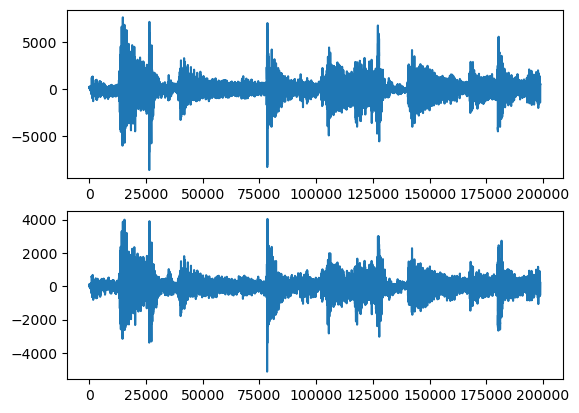

In [14]:
import matplotlib.pyplot as plt

plt.subplot(2, 1, 1)
plt.plot(samples_L)

plt.subplot(2, 1, 2)
plt.plot(samples_R)
plt.show()